In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
from scipy.stats import pearsonr


In [21]:
data = pd.read_csv('Data/RFLFSODataFull.csv')

In [22]:
data.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91379 entries, 0 to 91378
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                91379 non-null  float64
 1   RFL_Att                91379 non-null  float64
 2   AbsoluteHumidity       91379 non-null  float64
 3   AbsoluteHumidityMax    91379 non-null  float64
 4   AbsoluteHumidityMin    91379 non-null  float64
 5   Distance               91379 non-null  float64
 6   Frequency              91379 non-null  int64  
 7   Particulate            91379 non-null  float64
 8   ParticulateMax         91379 non-null  float64
 9   ParticulateMin         91379 non-null  float64
 10  RainIntensity          91379 non-null  float64
 11  RainIntensityMax       91379 non-null  float64
 12  RainIntensityMin       91379 non-null  float64
 13  RelativeHumidity       91379 non-null  float64
 14  SYNOPCode              91379 non-null  int64  
 15  Te

### Exploratary Data Analysis

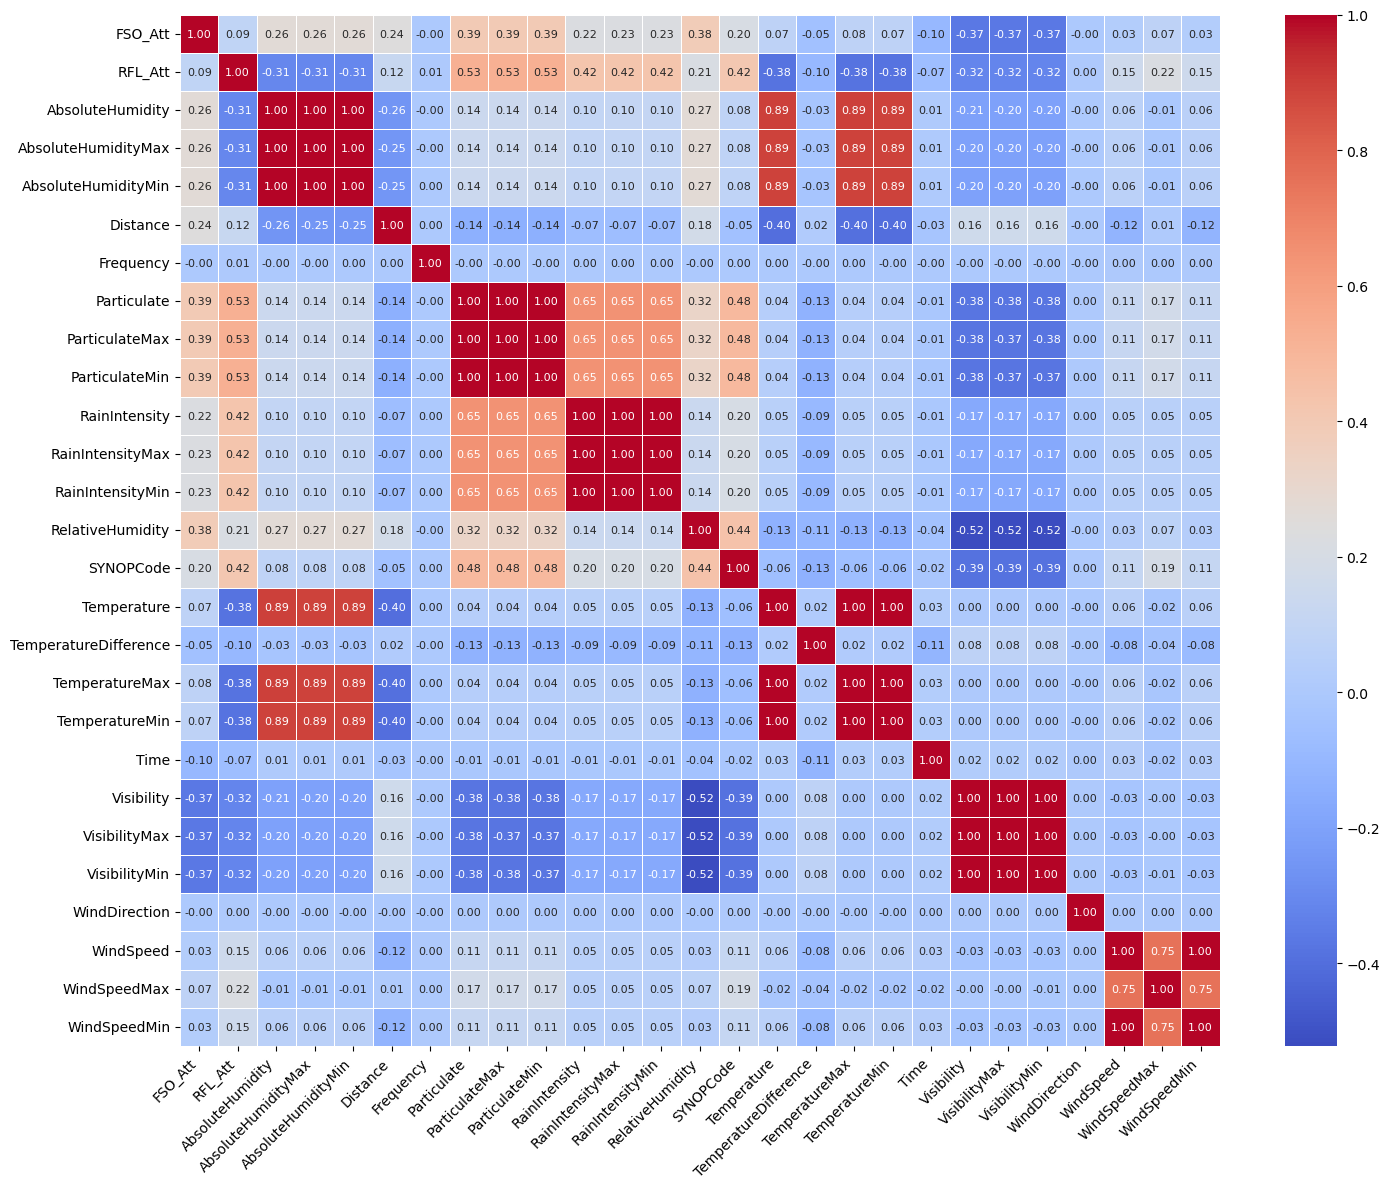

In [24]:
# Heatmap to visualize the correlation between features
plt.figure(figsize=(15, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
# Rotate the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

There is high correlation among the groups of humidity, particulate, rain, temperature, visibility and wind speed features, these can lead to collearity among features reducing the accuracy of the prediction model. For FSO_Att the Humidity, rain and particulate features show a positive correlation while visibilty shows a negative correlation. Temperature and and windspeed seems ot have no effect on FSO_Att. 

Similarly for RFL_Att, Rain and particulate feature show a positive correlation while visibilty shows a negative correlation. However, humidity features have a negative correlation with attenuation. Notably, the SYNOP Code shows a higher correlation with RFL_Att than FSO_Att indicating than RFL_Att is affected by diffferent weather conditions. RFL_att is also affected by varying wind conditions and Temperatures which seemed to have no effect on FSO_Att.

 ### Target Variable Distribution

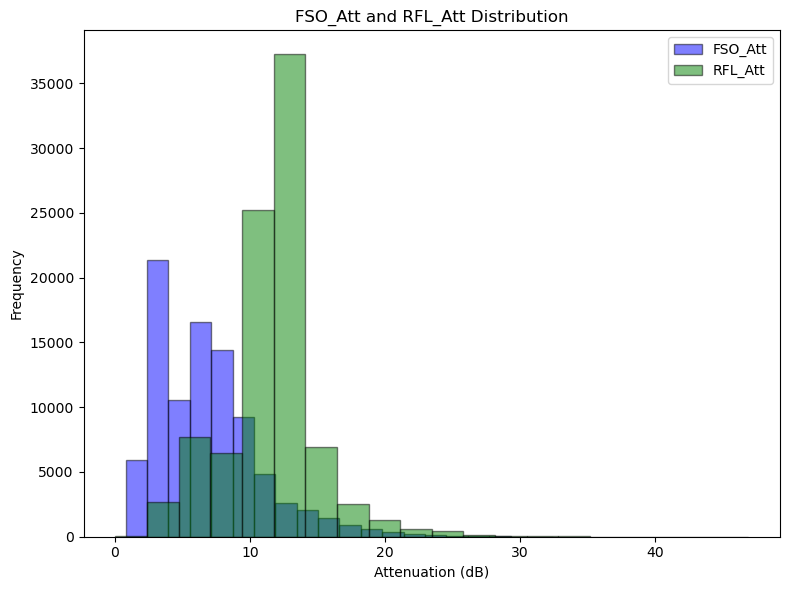

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/655680579.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['FSO_Att', 'RFL_Att'])


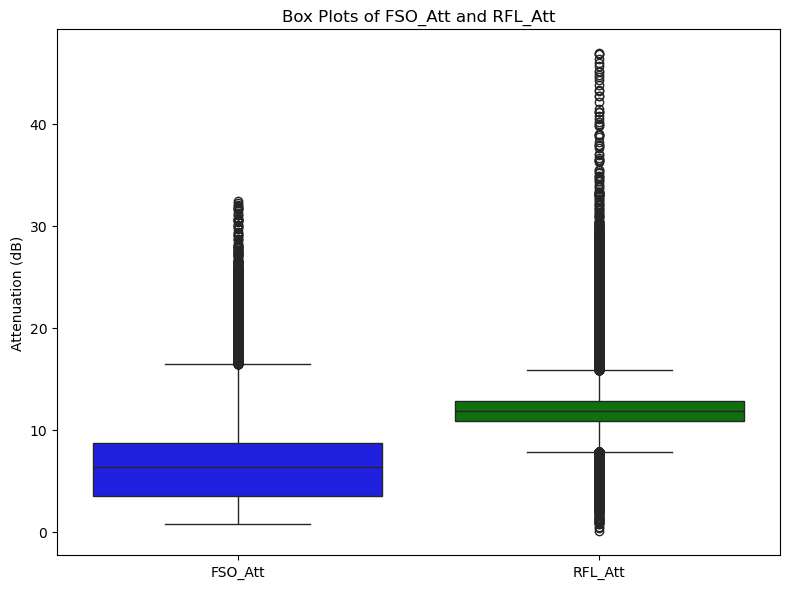

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Single Axes for Histograms
fig, ax = plt.subplots(figsize=(8, 6))
data['FSO_Att'].plot(
    kind='hist', 
    ax=ax, 
    color='blue', 
    edgecolor='black',
    alpha=0.5,  # Set translucency
    bins=20,
    label='FSO_Att'
)
data['RFL_Att'].plot(
    kind='hist', 
    ax=ax, 
    color='green', 
    edgecolor='black',
    alpha=0.5,  # Set translucency
    bins=20,
    label='RFL_Att'
)
ax.set_title('FSO_Att and RFL_Att Distribution')
ax.set_xlabel('Attenuation (dB)')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

# Single Axes for Box Plots
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=data[['FSO_Att', 'RFL_Att']], palette=['blue', 'green'], ax=ax)
ax.set_title('Box Plots of FSO_Att and RFL_Att')
ax.set_xticklabels(['FSO_Att', 'RFL_Att'])
ax.set_ylabel('Attenuation (dB)')
plt.tight_layout()
plt.show()


### Catergorical variable analysis

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/2406998983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=synop_counts.index, y=synop_counts.values, palette="viridis")


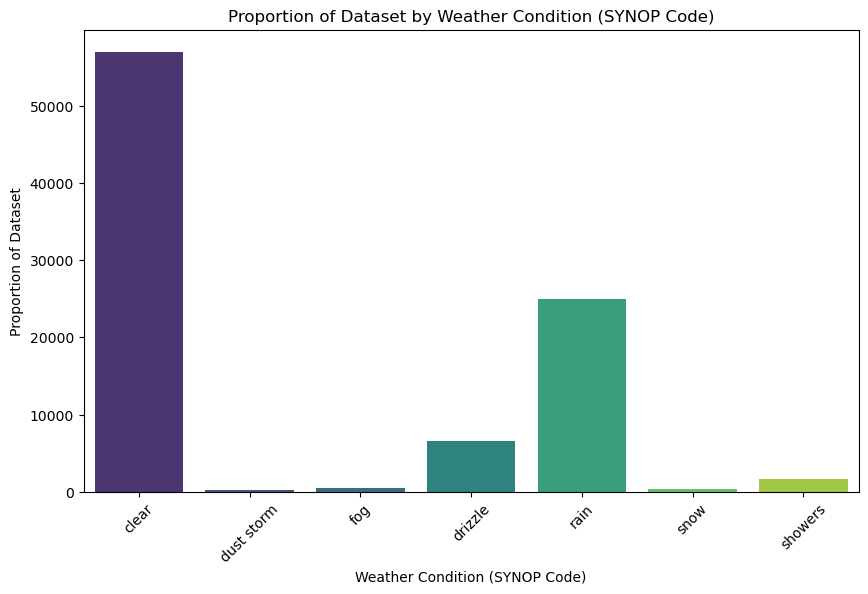

In [26]:
# Define SYNOP code descriptions and filter the dataset by each code
synop_codes = {
    '0': "clear",
    '3': "dust storm",
    '4': "fog",
    '5': "drizzle",
    '6': "rain",
    '7': "snow",
    '8': "shower"
    }

data['SYNOPCode'] =data['SYNOPCode'].astype(str)
# Plot the proportions of the dataset for each SYNOP code
synop_counts = data['SYNOPCode'].value_counts().reindex(synop_codes.keys(), fill_value=0)
synop_counts.index = synop_counts.index.map(synop_codes)
plt.figure(figsize=(10, 6))
sns.barplot(x=synop_counts.index, y=synop_counts.values, palette="viridis")
plt.xlabel("Weather Condition (SYNOP Code)")
plt.ylabel("Proportion of Dataset")
plt.title("Proportion of Dataset by Weather Condition (SYNOP Code)")
plt.xticks(rotation=45)
plt.show()

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/2798600093.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SYNOPDescription', y='FSO_Att', data=data, ax=axes[0], palette='viridis')
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/2798600093.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SYNOPDescription', y='RFL_Att', data=data, ax=axes[1], palette='viridis')


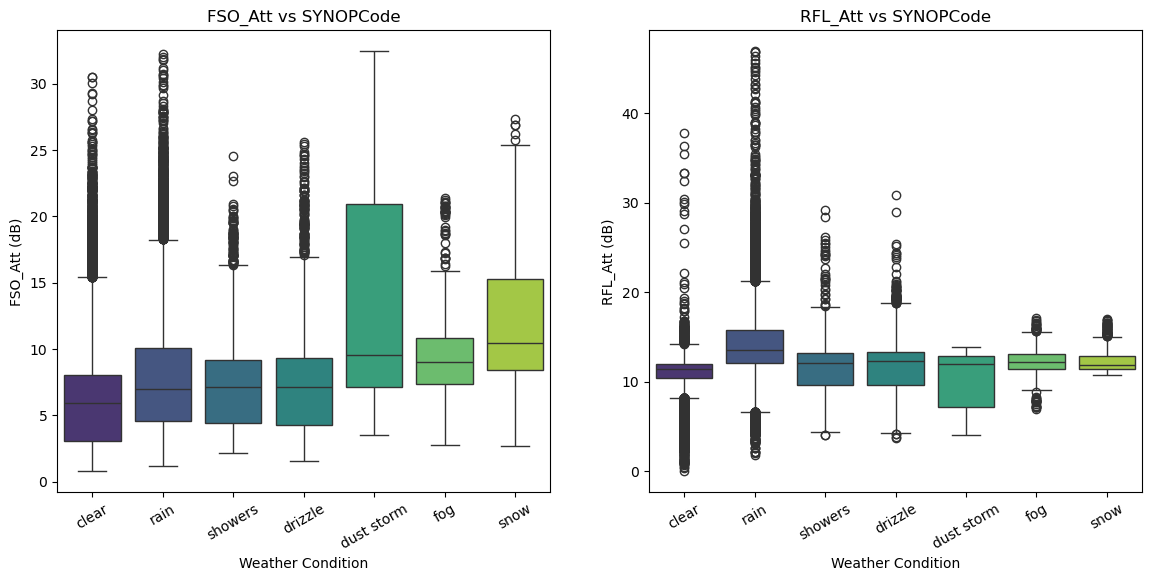

In [27]:
# Map SYNOPCode values to descriptions
data['SYNOPDescription'] = data['SYNOPCode'].map(synop_codes)

# Create subplots for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot: FSO_Att vs SYNOPCode
sns.boxplot(x='SYNOPDescription', y='FSO_Att', data=data, ax=axes[0], palette='viridis')
axes[0].set_title("FSO_Att vs SYNOPCode")
axes[0].set_xlabel("Weather Condition")
axes[0].set_ylabel("FSO_Att (dB)")
axes[0].tick_params(axis='x', rotation=30)

# Boxplot: RFL_Att vs SYNOPCode
sns.boxplot(x='SYNOPDescription', y='RFL_Att', data=data, ax=axes[1], palette='viridis')
axes[0].set_title("RFL_Att vs SYNOPCode")
axes[0].set_xlabel("Weather Condition")
axes[0].set_ylabel("RFL_Att (dB)")
axes[0].tick_params(axis='x', rotation=30)


/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/31111877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='FSO_Att', data=data, ax=axes[0], palette='husl')
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/31111877.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='RFL_Att', data=data, ax=axes[1], palette='muted')


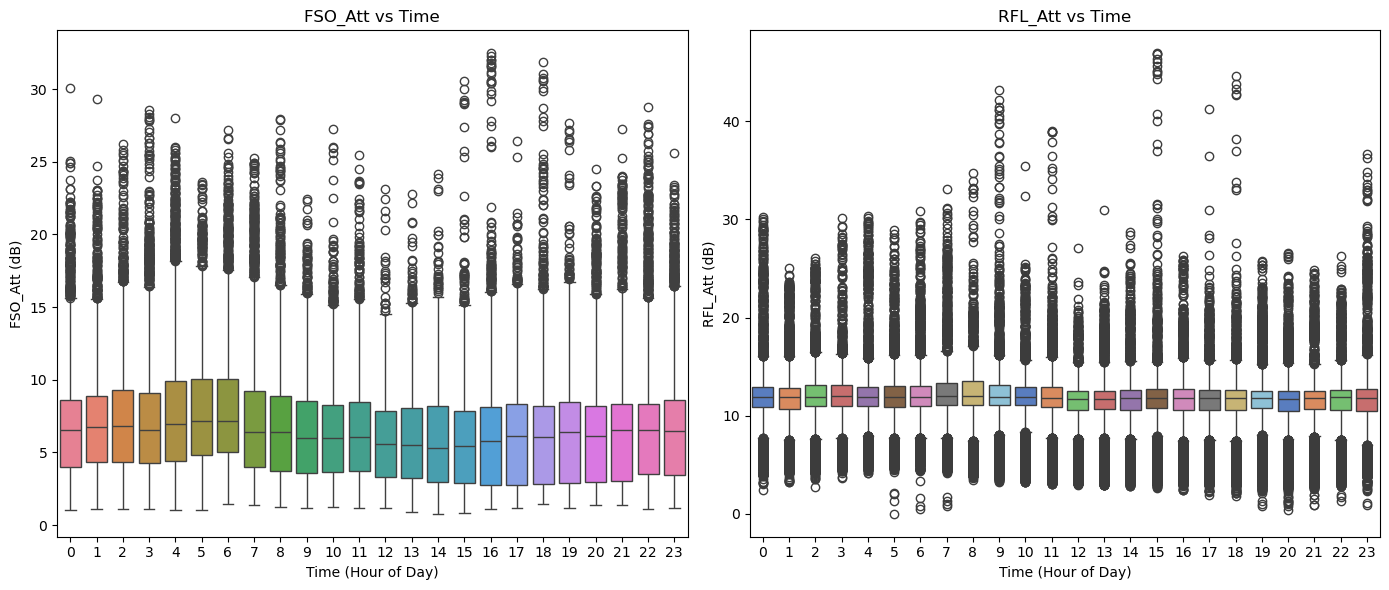

In [28]:
# Create subplots for boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Boxplot: FSO_Att vs Time
sns.boxplot(x='Time', y='FSO_Att', data=data, ax=axes[0], palette='husl')
axes[0].set_title("FSO_Att vs Time")
axes[0].set_xlabel("Time (Hour of Day)")
axes[0].set_ylabel("FSO_Att (dB)")

# Boxplot: RFL_Att vs Time
sns.boxplot(x='Time', y='RFL_Att', data=data, ax=axes[1], palette='muted')
axes[1].set_title("RFL_Att vs Time")
axes[1].set_xlabel("Time (Hour of Day)")
axes[1].set_ylabel("RFL_Att (dB)")

plt.tight_layout()
plt.show()
del data['SYNOPDescription']  #remove created column

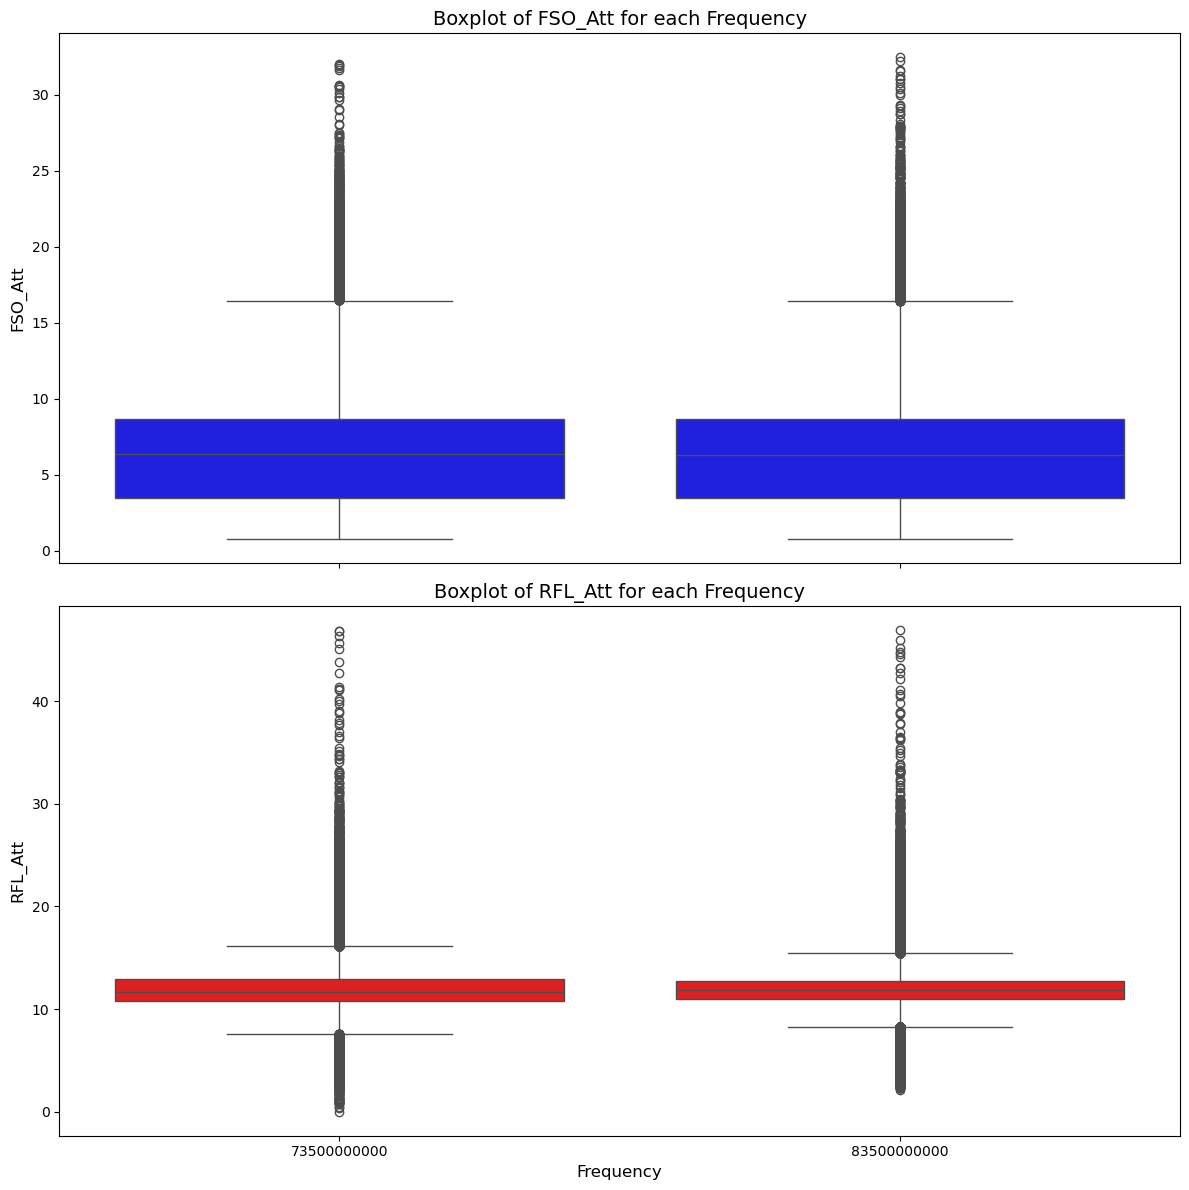

In [29]:
# Separate plots for FSO_Att and RFL_Att
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Boxplot for FSO_Att
sns.boxplot(x='Frequency', y='FSO_Att', data=data, ax=ax[0], color='blue')
ax[0].set_title('Boxplot of FSO_Att for each Frequency', fontsize=14)
ax[0].set_xlabel('Frequency', fontsize=12)
ax[0].set_ylabel('FSO_Att', fontsize=12)

# Boxplot for RFL_Att
sns.boxplot(x='Frequency', y='RFL_Att', data=data, ax=ax[1], color='red')
ax[1].set_title('Boxplot of RFL_Att for each Frequency', fontsize=14)
ax[1].set_xlabel('Frequency', fontsize=12)
ax[1].set_ylabel('RFL_Att', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

## Feature Selection

In [30]:
# Identify point where R² decrease is less than 1% and RMSE increase is greater than 2%
R2_TRESHOLD = 0.01 
RMSE_THRESHOLD = 0.02
def find_threshold(data_table):
    for i in range(0, len(data_table)):
        r2_decrease = (data_table['R2'].iloc[i] - data_table['R2'].iloc[i + 1])/ (data_table['R2'].iloc[i])
        rmse_increase = ( data_table['RMSE'].iloc[i + 1]- data_table['RMSE'].iloc[i])/ (data_table['RMSE'].iloc[i])
        # The relative decrease in R² between iterations is small ( below a threshold 0.01 or 1%).
        # The relative increase in RMSE between iterations exceeds a threshold (0.05 or 2%).
        if r2_decrease > R2_TRESHOLD and  rmse_increase > RMSE_THRESHOLD: 
            return i
    return len(data_table) - 1  # Default to the last index if no threshold found

### Method 1 (Specific Random Forest)

In [ ]:
def plot_feature_selection(
    rfl_table,
    fso_table,
    rfl_threshold=None,
    fso_threshold=None,
    title="Feature Selection Performance"
):
    """
    Generates side-by-side plots of RMSE and R² for RFL_Att and FSO_Att
    as a function of removed features in feature selection.
    
    Parameters
    ----------
    rfl_table : pd.DataFrame
        DataFrame containing columns:
            - 'Removed_Feature'
            - 'RMSE'
            - 'R2'
        for the RFL_Att feature selection iteration.
        
    fso_table : pd.DataFrame
        DataFrame containing columns:
            - 'Removed_Feature'
            - 'RMSE'
            - 'R2'
        for the FSO_Att feature selection iteration.
        
    rfl_threshold : int, optional
        The index from feature selection to mark on RFL plot 
        (e.g., from find_threshold(...)). If None, no vertical line is drawn.
        
    fso_threshold : int, optional
        The index from feature selection to mark on FSO plot.
        If None, no vertical line is drawn.
        
    title : str, optional
        A main title for the figure. Defaults to "Feature Selection Performance".
    
    Returns
    -------
    fig : matplotlib.figure.Figure
        The created figure object.
    axes : np.ndarray of matplotlib.axes.Axes
        The array of subplot axes ([ax_rfl, ax_fso]).
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    # --------------------------
    # Left Plot: RFL_Att
    # --------------------------
    axes[0].plot(
        rfl_table['Removed_Feature'],
        rfl_table['RMSE'],
        label="RMSE (dB)",
        color="blue"
    )
    axes[0].set_ylabel("RMSE (dB)", color="blue")
    axes[0].tick_params(axis="y", labelcolor="blue")

    ax_r4 = axes[0].twinx()
    ax_r4.plot(
        rfl_table['Removed_Feature'],
        rfl_table['R2'],
        label="R²",
        color="red"
    )
    ax_r4.set_ylabel("R²", color="red")
    ax_r4.tick_params(axis="y", labelcolor="red")

    # Mark threshold if given
    if rfl_threshold is not None and 0 <= rfl_threshold < len(rfl_table):
        axes[0].axvline(
            x=rfl_threshold,
            color="green",
            linestyle="--",
            label="1% R² Threshold"
        )

    axes[0].set_title("(a) RFL_Att")
    axes[0].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)

    # --------------------------
    # Right Plot: FSO_Att
    # --------------------------
    axes[1].plot(
        fso_table['Removed_Feature'],
        fso_table['RMSE'],
        label="RMSE (dB)",
        color="blue"
    )
    axes[1].set_ylabel("RMSE (dB)", color="blue")
    axes[1].tick_params(axis="y", labelcolor="blue")

    ax_f2 = axes[1].twinx()
    ax_f2.plot(
        fso_table['Removed_Feature'],
        fso_table['R2'],
        label="R²",
        color="red"
    )
    ax_f2.set_ylabel("R²", color="red")
    ax_f2.tick_params(axis="y", labelcolor="red")

    # Mark threshold if given
    if fso_threshold is not None and 0 <= fso_threshold < len(fso_table):
        axes[1].axvline(
            x=fso_threshold,
            color="green",
            linestyle="--",
            label="1% R² Threshold"
        )

    axes[1].set_title("(b) FSO_Att")
    axes[1].set_xticklabels(fso_table['Removed_Feature'], rotation=90)

    plt.tight_layout()
    plt.show()
    
    return fig, axes

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rfl_table_final = pd.concat([rfl_table_final, rfl_table])
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fso_table_final = pd.concat([fso_table_final, fso_table])
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be u

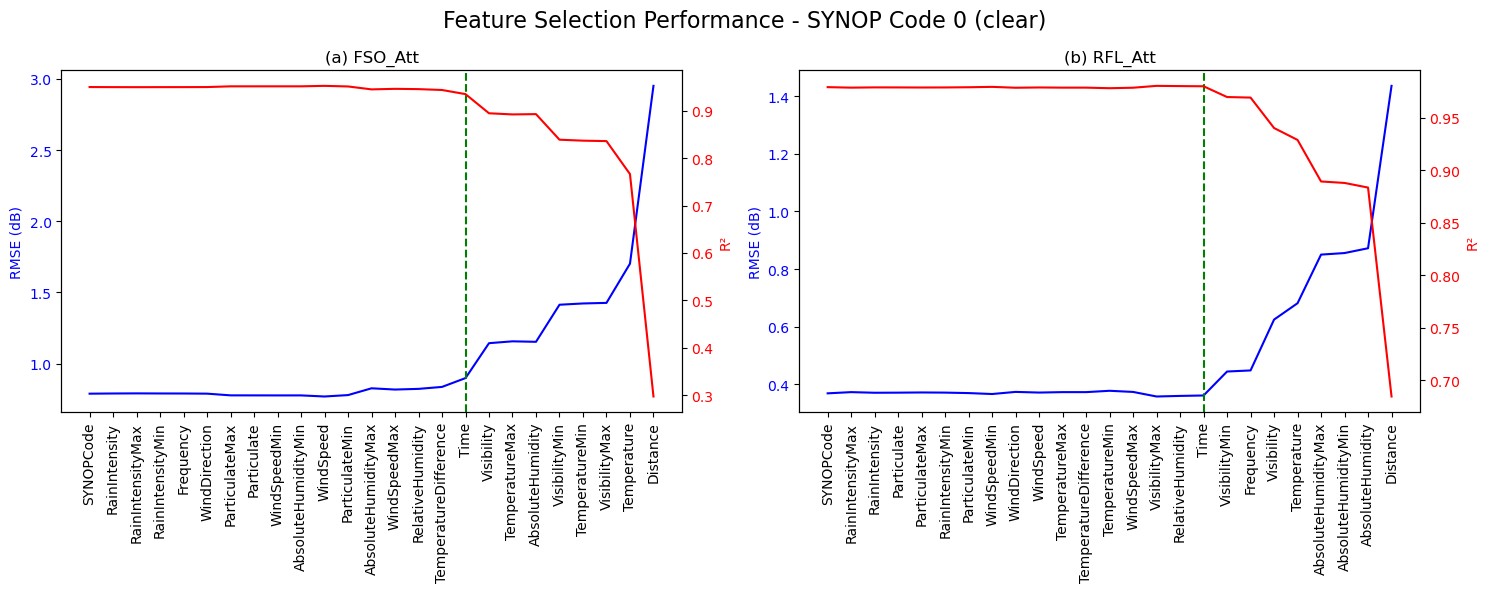

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


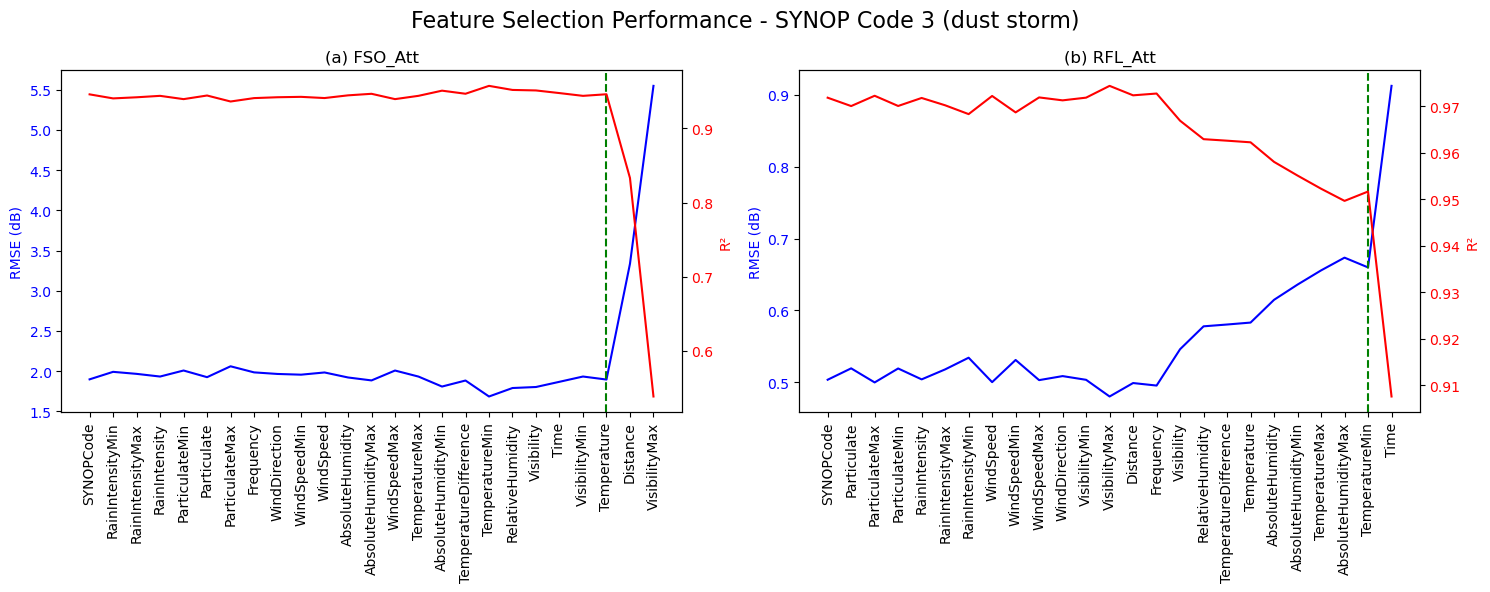

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


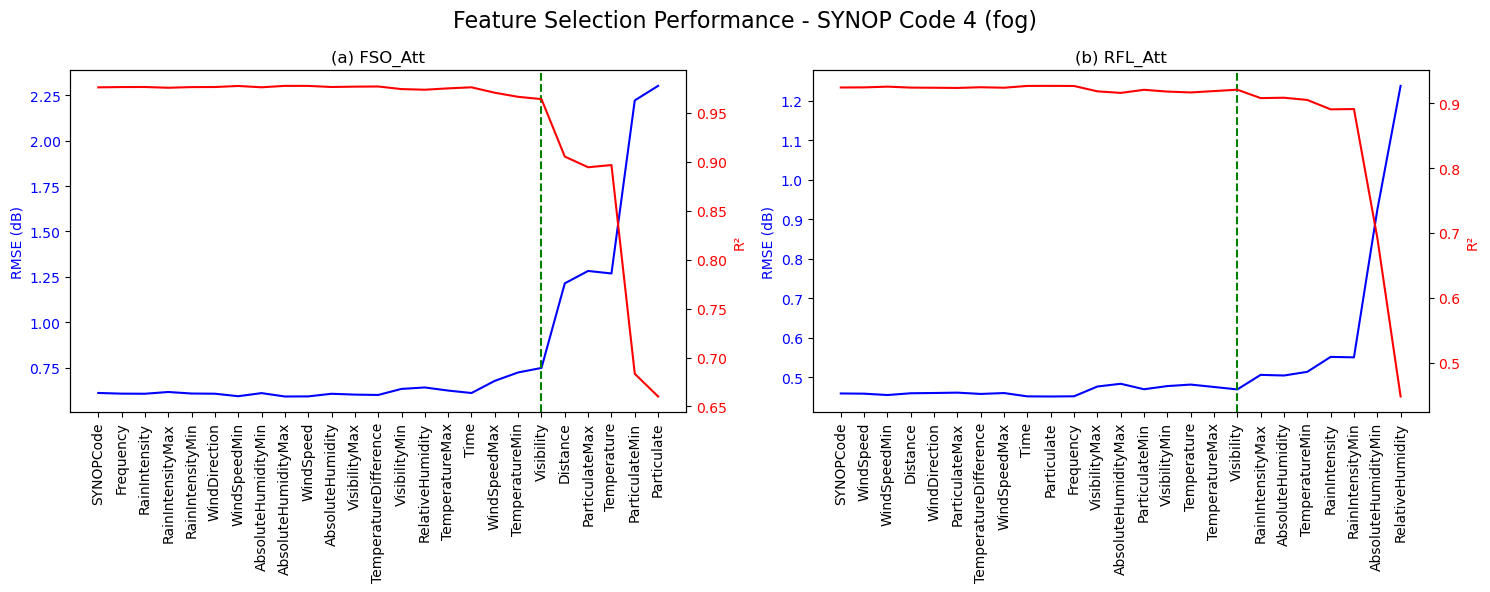

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


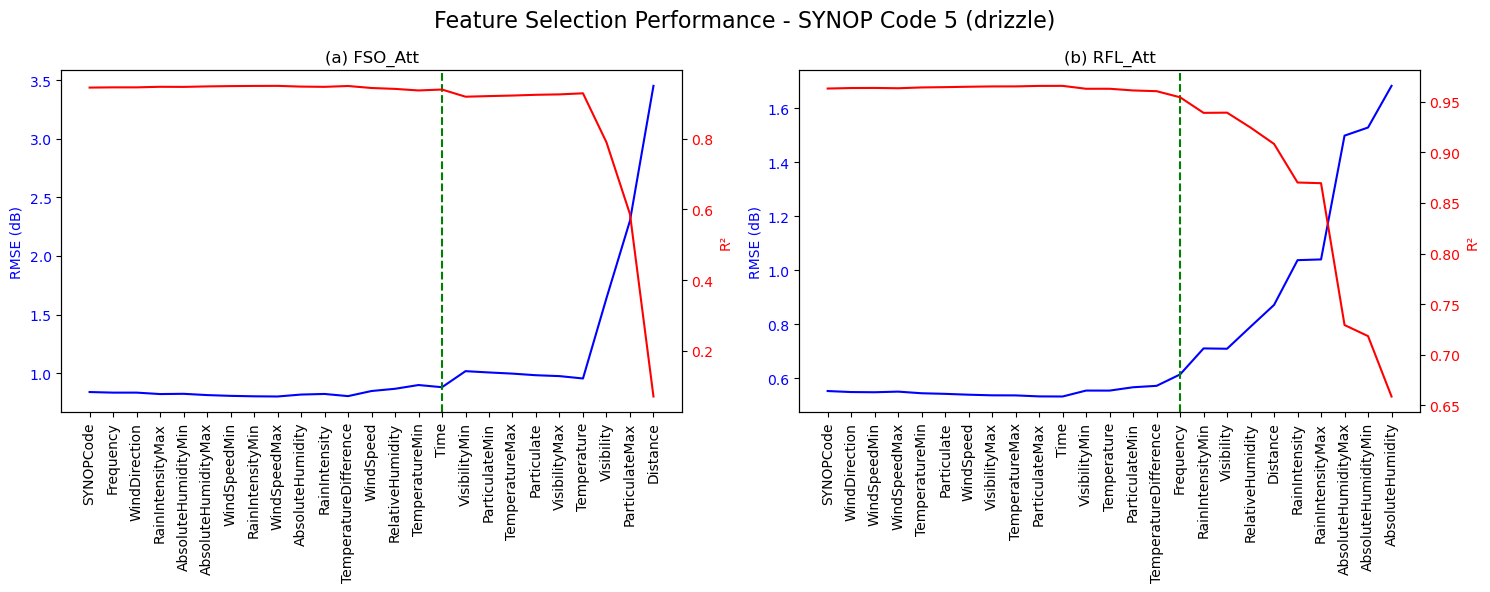

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


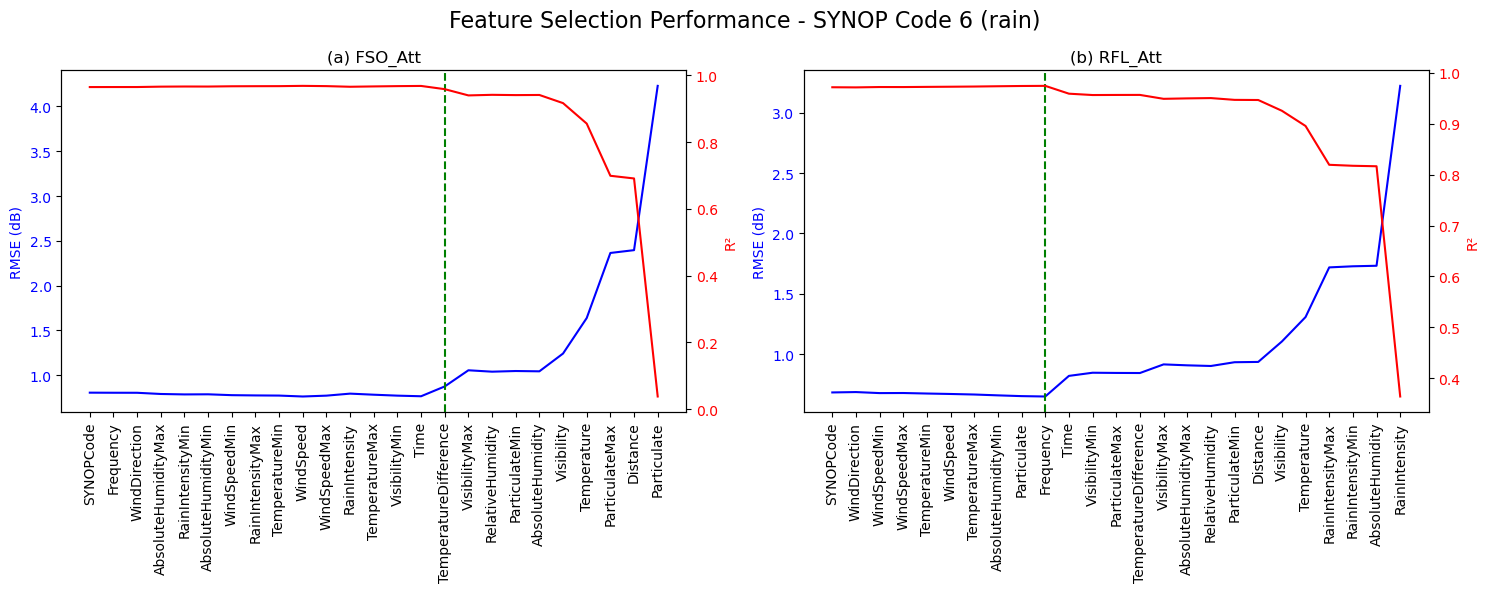

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


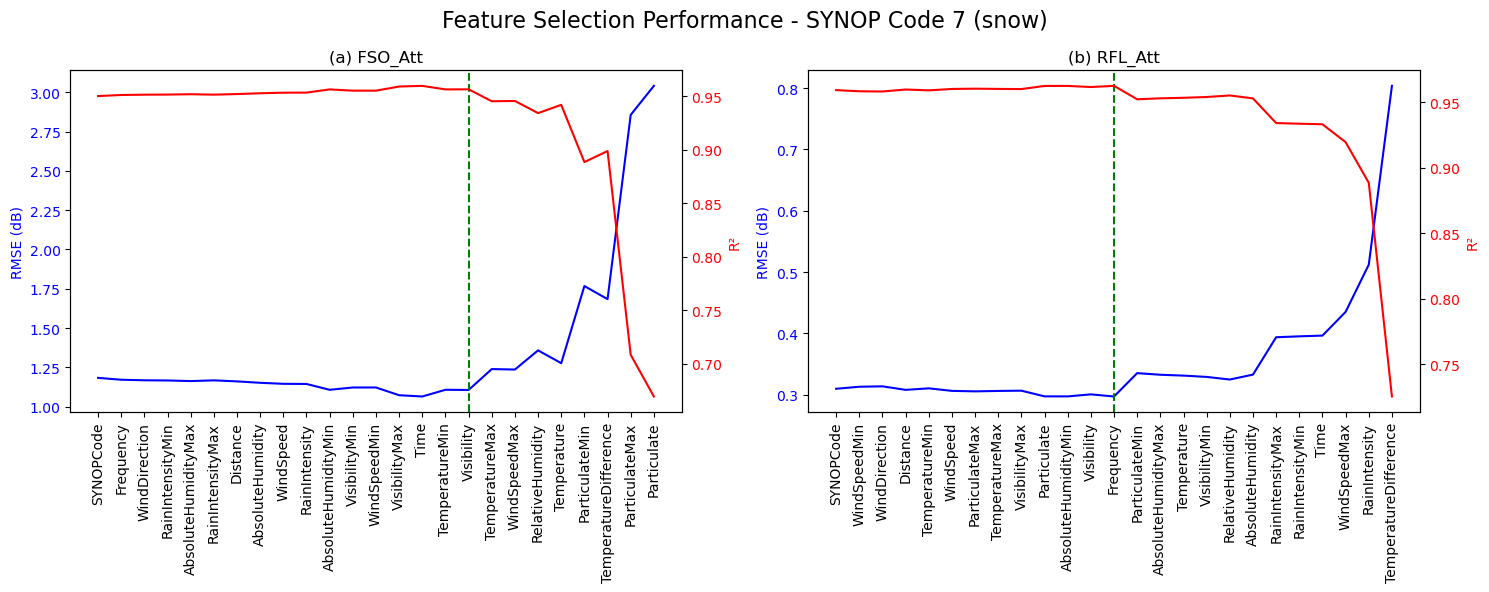

/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/208168810.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


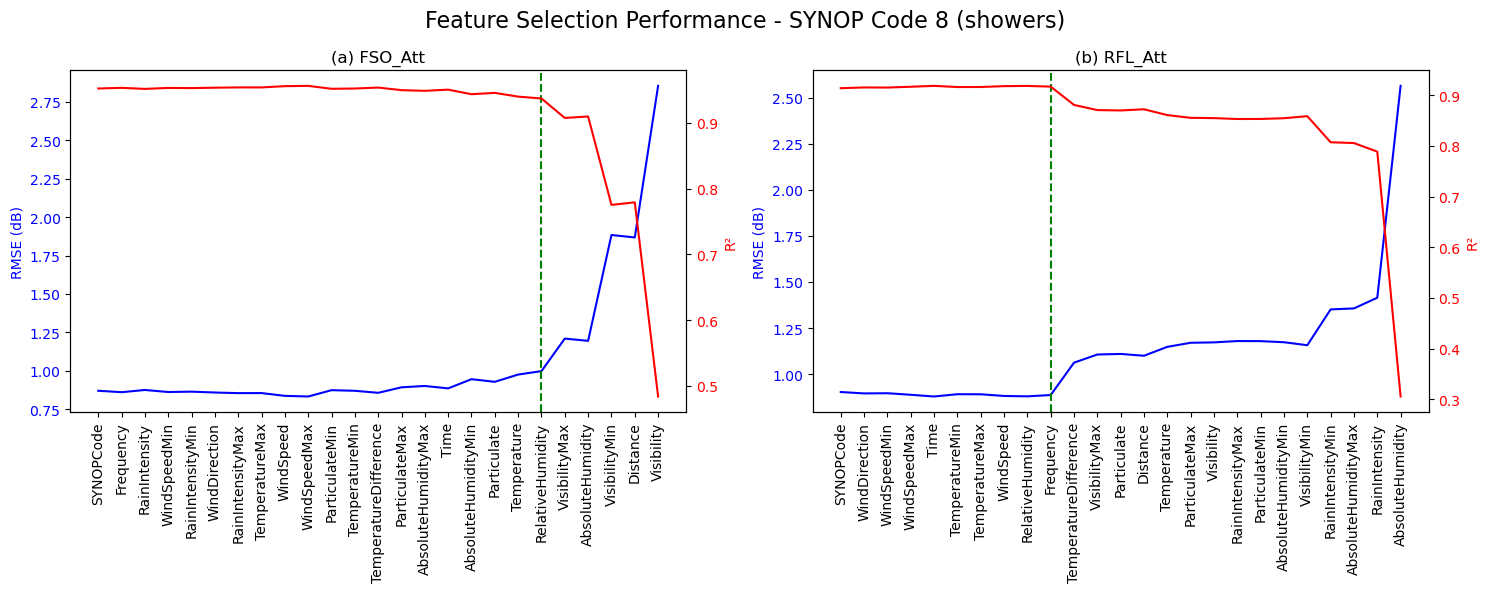

In [31]:
# Perform feature selection and plotting for each subset of data by SYNOP code
rfl_table_final = pd.DataFrame(columns = ['SYNOPCode','Removed_Feature', 'RMSE', 'R2'])
fso_table_final =  pd.DataFrame(columns = ['SYNOPCode','Removed_Feature', 'RMSE', 'R2'])
for code, condition in synop_codes.items():
    subset_data = data[data['SYNOPCode'] == code]
    
    # Skip if the subset is too small to train
    if len(subset_data) < 100:
        print(f"Skipping SYNOP code {code} ({condition}) due to insufficient data.")
        continue
    
    # Initialize separate tables for FSO_Att and RFL_Att for each SYNOP code
    target_features = ['FSO_Att', 'RFL_Att']
    result_tables = {target: [] for target in target_features}

    for target in target_features:
        remaining_features = [col for col in subset_data.columns if col not in target_features]
        
        while remaining_features:
            rf = RandomForestRegressor(oob_score=True, random_state=42)
            rf.fit(subset_data[remaining_features], subset_data[target])

            oob_predictions = rf.oob_prediction_
            rmse = sqrt(mean_squared_error(subset_data[target], oob_predictions))
            r2 = r2_score(subset_data[target], oob_predictions)

            importances = rf.feature_importances_
            feature_importances = pd.Series(importances, index=remaining_features).sort_values()

            least_important_feature = feature_importances.idxmin()

            result_tables[target].append({
                'Removed_Feature': least_important_feature,
                'RMSE': rmse,
                'R2': r2
            })

            remaining_features.remove(least_important_feature)

    # Convert result tables to DataFrames
    fso_table = pd.DataFrame(result_tables['FSO_Att'])
    rfl_table = pd.DataFrame(result_tables['RFL_Att'])
    fso_table['SYNOPCode'] = code
    rfl_table['SYNOPCode'] = code
    fso_threshold = find_threshold(fso_table)
    rfl_threshold = find_threshold(rfl_table)

    rfl_table_final = pd.concat([rfl_table_final, rfl_table])
    fso_table_final = pd.concat([fso_table_final, fso_table])

    # Plotting RMSE and R² for FSO_Att and RFL_Att for each SYNOP code subset
    fig, axes = plot_feature_selection(
    rfl_table=rfl_table,
    fso_table=fso_table,
    rfl_threshold=rfl_threshold,
    fso_threshold=fso_threshold,
    title=f"Feature Selection Performance - SYNOP Code {code} ({condition})"
)
    
    
    
    # fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # fig.suptitle(f"Feature Selection Performance - SYNOP Code {code} ({condition})", fontsize=16)

    # # Plot for FSO_Att
    # axes[1].plot(fso_table['Removed_Feature'], fso_table['RMSE'], label="RMSE (dB)", color="blue")
    # axes[1].set_ylabel("RMSE (dB)", color="blue")
    # axes[1].tick_params(axis="y", labelcolor="blue")
    # ax2 = axes[1].twinx()
    # ax2.plot(fso_table['Removed_Feature'], fso_table['R2'], label="R²", color="red")
    # ax2.set_ylabel("R²", color="red")
    # ax2.tick_params(axis="y", labelcolor="red")
    # axes[1].axvline(x=fso_threshold, color="green", linestyle="--", label="1% R² Threshold")
    # axes[1].set_title("(a) FSO_Att")
    # axes[1].set_xticklabels(fso_table['Removed_Feature'], rotation=90)

    # # Plot for RFL_Att
    # axes[0].plot(rfl_table['Removed_Feature'], rfl_table['RMSE'], label="RMSE (dB)", color="blue")
    # axes[0].set_ylabel("RMSE (dB)", color="blue")
    # axes[0].tick_params(axis="y", labelcolor="blue")
    # ax4 = axes[0].twinx()
    # ax4.plot(rfl_table['Removed_Feature'], rfl_table['R2'], label="R²", color="red")
    # ax4.set_ylabel("R²", color="red")
    # ax4.tick_params(axis="y", labelcolor="red")
    # axes[0].axvline(x=rfl_threshold, color="green", linestyle="--", label="1% R² Threshold")
    # axes[0].set_title("(b) RFL_Att")
    # axes[0].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)

    # plt.tight_layout()
    # plt.show()


### Method 2 (Generic random forest) 

In [32]:
# Initialize separate tables for FSO_Att and RFL_Att
target_features = ['FSO_Att', 'RFL_Att']
result_tables = {target: [] for target in target_features}

for target in target_features:
    # Initialize feature set and empty results table for each target
    remaining_features = [col for col in data.columns if col not in target_features]
    
    # Iteratively perform feature selection
    while remaining_features:
        # Train Random Forest with current features
        rf = RandomForestRegressor(oob_score=True, random_state=42)
        rf.fit(data[remaining_features], data[target])

        # Calculate RMSE and R² using OOB predictions
        oob_predictions = rf.oob_prediction_
        rmse = sqrt(mean_squared_error(data[target], oob_predictions))
        r2 = r2_score(data[target], oob_predictions)

        # Feature importances for ranking
        importances = rf.feature_importances_
        feature_importances = pd.Series(importances, index=remaining_features).sort_values()

        # Get least important feature
        least_important_feature = feature_importances.idxmin()

        # Append results to the target's result table
        result_tables[target].append({
            'Removed_Feature': least_important_feature,
            'RMSE': rmse,
            'R2': r2
        })

        # Remove least important feature from remaining features
        remaining_features.remove(least_important_feature)

# Convert result tables to DataFrames
fso_table = pd.DataFrame(result_tables['FSO_Att'])
rfl_table = pd.DataFrame(result_tables['RFL_Att'])
fso_table['SYNOPCode'] = 'generic'
rfl_table['SYNOPCode'] = 'generic'
fso_threshold = find_threshold(fso_table)
rfl_threshold = find_threshold(rfl_table)

rfl_table_final = pd.concat([rfl_table_final, rfl_table])
fso_table_final = pd.concat([fso_table_final, fso_table])


/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/564836254.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(fso_table['Removed_Feature'], rotation=90)
/var/folders/bq/6pxxtk6s1rq_ydzqc18mychr0000gn/T/ipykernel_59649/564836254.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)


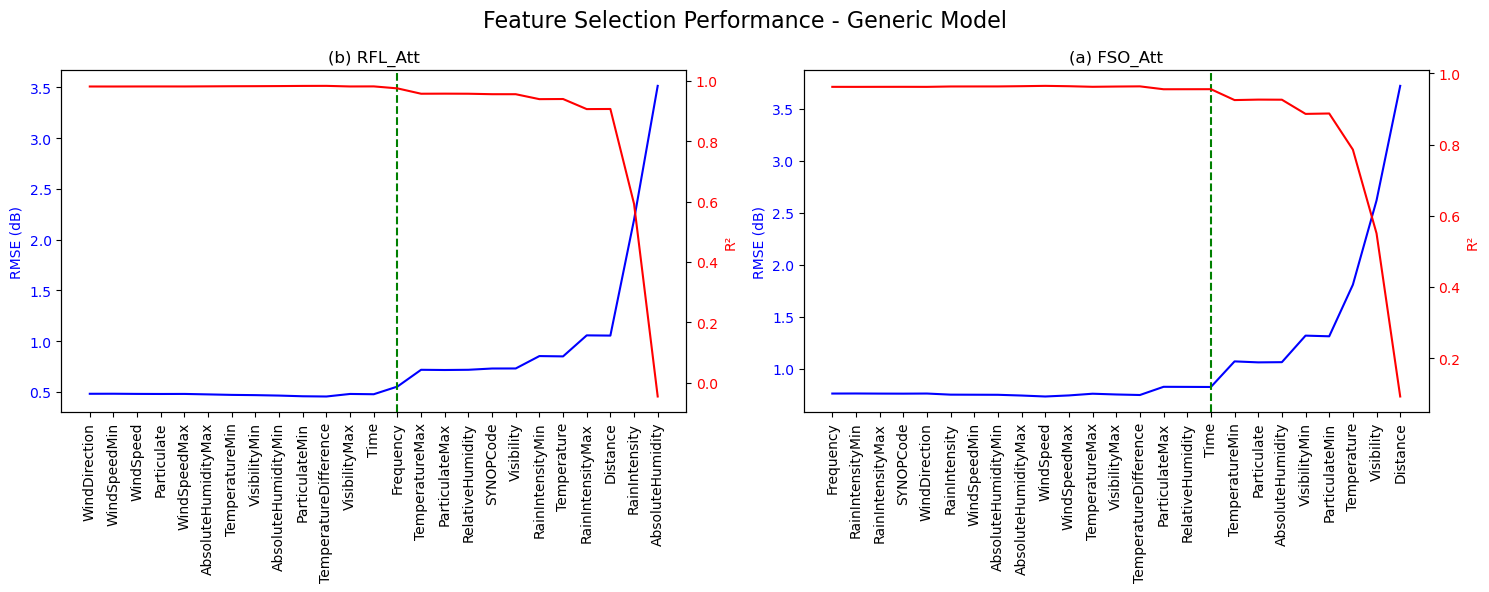

In [50]:

# Plotting similar to the example for both FSO_Att and RFL_Att
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f"Feature Selection Performance - Generic Model", fontsize=16)
# Plot for FSO_Att
axes[1].plot(fso_table['Removed_Feature'], fso_table['RMSE'], label="RMSE (dB)", color="blue")
axes[1].set_ylabel("RMSE (dB)", color="blue")
axes[1].tick_params(axis="y", labelcolor="blue")
ax2 = axes[1].twinx()
ax2.plot(fso_table['Removed_Feature'], fso_table['R2'], label="R²", color="red")
ax2.set_ylabel("R²", color="red")
ax2.tick_params(axis="y", labelcolor="red")
axes[1].axvline(x=fso_threshold, color="green", linestyle="--", label="1% R² Threshold")
axes[1].set_title("(a) FSO_Att")
axes[1].set_xticklabels(fso_table['Removed_Feature'], rotation=90)

# Plot for RFL_Att
axes[0].plot(rfl_table['Removed_Feature'], rfl_table['RMSE'], label="RMSE (dB)", color="blue")
axes[0].set_ylabel("RMSE (dB)", color="blue")
axes[0].tick_params(axis="y", labelcolor="blue")
ax4 = axes[0].twinx()
ax4.plot(rfl_table['Removed_Feature'], rfl_table['R2'], label="R²", color="red")
ax4.set_ylabel("R²", color="red")
ax4.tick_params(axis="y", labelcolor="red")
axes[0].axvline(x=rfl_threshold, color="green", linestyle="--", label="1% R² Threshold")
axes[0].set_title("(b) RFL_Att")
axes[0].set_xticklabels(rfl_table['Removed_Feature'], rotation=90)

plt.tight_layout()
plt.show()


In [34]:

rfl_table_final.to_csv('rfl_table_final.csv', index = False)
fso_table_final.to_csv('fso_table_final.csv', index = False)


In [9]:
import json
synop_codes = {
    '0': "clear",
    '3': "dust storm",
    '4': "fog",
    '5': "drizzle",
    '6': "rain",
    '7': "snow",
    '8': "shower"
    }
with open('synop_codes.json', "w") as fp:
    json.dump(synop_codes, fp)

In [10]:
#read data and feature selection tables
# Define SYNOP code descriptions and filter the dataset by each code

data = pd.read_csv('Data/RFLFSODataFull.csv')
data['SYNOPCode'] =data['SYNOPCode'].astype(str) 
rfl_table_final = pd.read_csv('rfl_table_final.csv')
fso_table_final=  pd.read_csv('fso_table_final.csv')



In [11]:
# Identify point where R² decrease is less than 1% and RMSE increase is greater than 2%
R2_TRESHOLD = 0.01 
RMSE_THRESHOLD = 0.02
def find_threshold(data_table):
    for i in range(0, len(data_table)):
        r2_decrease = (data_table['R2'].iloc[i] - data_table['R2'].iloc[i + 1])/ (data_table['R2'].iloc[i])
        rmse_increase = ( data_table['RMSE'].iloc[i + 1]- data_table['RMSE'].iloc[i])/ (data_table['RMSE'].iloc[i])
        # The relative decrease in R² between iterations is small ( below a threshold 0.01 or 1%).
        # The relative increase in RMSE between iterations exceeds a threshold (0.05 or 2%).
        if r2_decrease > R2_TRESHOLD and  rmse_increase > RMSE_THRESHOLD: 
            return i
    return len(data_table) - 1  # Default to the last index if no threshold found

In [12]:
def extract_selected_features(table):
    """
    Finds the threshold index for selecting the most important features.
    Extract features following the threshold index.
    """ 
    feature_index = find_threshold(table)
    # manuaually choose best features RFL specfic model (dust storm) based on feature selection performance plot
    if feature_index>=23:
        feature_index = 14
        
    selected_features = table['Removed_Feature'][feature_index:]

    return selected_features


In [13]:
# Get unique selected features for each target model after thresholding
fso_important_features = fso_table_final.groupby('SYNOPCode')[['RMSE','R2','Removed_Feature']].apply(lambda x: extract_selected_features(x))
rfl_important_features = rfl_table_final.groupby('SYNOPCode')[['RMSE','R2','Removed_Feature']].apply(lambda x: extract_selected_features(x))


In [14]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import joblib
import os
import json
def train_and_evaluate_with_hyperparameter_tuning(data, fso_features, rfl_features, param_grid):
    # Split the data into train+valid and test sets, stratified by SYNOPCode
    train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['SYNOPCode'], random_state=23)

    # Initialize dictionaries to store results and best parameters
    rmse_results = {'RFL_Specific': [], 'RFL_Generic': [], 'FSO_Specific': [], 'FSO_Generic': []}
    r2_results = {'RFL_Specific': [], 'RFL_Generic': [], 'FSO_Specific': [], 'FSO_Generic': []}
    best_params_fso = {}
    best_params_rfl = {}
    synop_conditions = list(synop_codes.values())

    # Method 1: Hyperparameter tuning for specific models
    for code in synop_codes.keys():
        train_subset = train_data[train_data['SYNOPCode'] == code]

        if len(train_subset) < 100:
            print('skipped')
            continue

        # Hyperparameter tuning for FSO_Att specific model
        X_train_fso = train_subset[fso_features[code]]
        y_train_fso = train_subset['FSO_Att']
        rf_fso = RandomForestRegressor(random_state=42)
        rf_fso_random = RandomizedSearchCV(estimator=rf_fso, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
        rf_fso_random.fit(X_train_fso, y_train_fso)
        best_params_fso[code] = rf_fso_random.best_params_

        # Hyperparameter tuning for RFL_Att specific model
        X_train_rfl = train_subset[rfl_features[code]]
        y_train_rfl = train_subset['RFL_Att']
        rf_rfl = RandomForestRegressor(random_state=42)
        rf_rfl_random = RandomizedSearchCV(estimator=rf_rfl, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
        rf_rfl_random.fit(X_train_rfl, y_train_rfl)
        best_params_rfl[code] = rf_rfl_random.best_params_

    # Method 2: Hyperparameter tuning for generic models
    train_data['SYNOPCode'] = train_data['SYNOPCode'].astype('category')
    test_data['SYNOPCode'] = test_data['SYNOPCode'].astype('category')

    # Hyperparameter tuning for FSO_Generic model
    rf_fso_generic = RandomForestRegressor(random_state=42)
    rf_fso_generic_random = RandomizedSearchCV(estimator=rf_fso_generic, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
    rf_fso_generic_random.fit(train_data[fso_features['generic']], train_data['FSO_Att'])
    best_params_fso['generic'] = rf_fso_generic_random.best_params_

    # Hyperparameter tuning for RFL_Generic model
    rf_rfl_generic = RandomForestRegressor(random_state=42)
    rf_rfl_generic_random = RandomizedSearchCV(estimator=rf_rfl_generic, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
    rf_rfl_generic_random.fit(train_data[rfl_features['generic']], train_data['RFL_Att'])
    best_params_rfl['generic'] = rf_rfl_generic_random.best_params_

    # Train final specific models and evaluate on the test set
    """
    Returns two dictionaries of final trained models:
      - fso_models[code] = trained FSO model for that code
      - rfl_models[code] = trained RFL model for that code
    Also includes fso_models['generic'], rfl_models['generic'] for the generic case.
    """
    fso_models = {}
    rfl_models = {}

    # Train "Specific" models by SYNOP code
    for code in synop_codes.keys():
        train_subset = train_data[train_data['SYNOPCode'] == code]
        test_subset = test_data[test_data['SYNOPCode'] == code]

        if len(train_subset) < 100 or len(test_subset) < 10:
            continue

        # FSO_Specific model
        fso_model_final = RandomForestRegressor(**best_params_fso[code], random_state=42)
        fso_model_final.fit(train_subset[fso_features[code]], train_subset['FSO_Att'])
        fso_models[code] = fso_model_final
        fso_preds_final = fso_model_final.predict(test_subset[fso_features[code]])
        rmse_results['FSO_Specific'].append(np.sqrt(mean_squared_error(test_subset['FSO_Att'], fso_preds_final)))
        r2_results['FSO_Specific'].append(r2_score(test_subset['FSO_Att'], fso_preds_final))

        # RFL_Specific model
        rfl_model_final = RandomForestRegressor(**best_params_rfl[code], random_state=42)
        rfl_model_final.fit(train_subset[rfl_features[code]], train_subset['RFL_Att'])
        rfl_models[code] = rfl_model_final
        rfl_preds_final = rfl_model_final.predict(test_subset[rfl_features[code]])
        rmse_results['RFL_Specific'].append(np.sqrt(mean_squared_error(test_subset['RFL_Att'], rfl_preds_final)))
        r2_results['RFL_Specific'].append(r2_score(test_subset['RFL_Att'], rfl_preds_final))

    # Train final generic models and evaluate on each SYNOPCode subset in the test set
    fso_generic_model = RandomForestRegressor(**best_params_fso['generic'], random_state=42)
    fso_generic_model.fit(train_data[fso_features['generic']], train_data['FSO_Att'])
    fso_models['generic'] = fso_generic_model
    rfl_generic_model = RandomForestRegressor(**best_params_rfl['generic'], random_state=42)
    rfl_generic_model.fit(train_data[rfl_features['generic']], train_data['RFL_Att'])
    rfl_models['generic'] = rfl_generic_model

    for code in synop_codes.keys():
        test_subset = test_data[test_data['SYNOPCode'] == code]
        if len(test_subset) < 10:
            continue

        # FSO_Generic model evaluation
        fso_generic_preds = fso_generic_model.predict(test_subset[fso_features['generic']])
        rmse_results['FSO_Generic'].append(np.sqrt(mean_squared_error(test_subset['FSO_Att'], fso_generic_preds)))
        r2_results['FSO_Generic'].append(r2_score(test_subset['FSO_Att'], fso_generic_preds))

        # RFL_Generic model evaluation
        rfl_generic_preds = rfl_generic_model.predict(test_subset[rfl_features['generic']])
        rmse_results['RFL_Generic'].append(np.sqrt(mean_squared_error(test_subset['RFL_Att'], rfl_generic_preds)))
        r2_results['RFL_Generic'].append(r2_score(test_subset['RFL_Att'], rfl_generic_preds))

    return rmse_results, r2_results, synop_conditions, best_params_fso, best_params_rfl, fso_models, rfl_models, train_data, test_data


In [15]:

# Execute the function with the defined parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model_path  = "model/"
fso_models_path = model_path  + "fso_models.pkl"
rfl_models_path = model_path  +"rfl_models.pkl"
train_data_path = model_path  +"train_data.csv"
test_data_path = model_path  +"test_data.csv"
best_params_fso_path = model_path  +"best_params_fso.json"
best_params_rfl_path = model_path  + "best_params_rfl.json"
rmse_results_path = model_path  + "rmse_results.csv"
r2_results_path = model_path  + "r2_results.csv"

In [16]:

import os
# Check if saved files exist
if (os.path.isfile(fso_models_path) and
    os.path.isfile(rfl_models_path) and
    os.path.isfile(train_data_path) and
    os.path.isfile(test_data_path) and
    os.path.isfile(best_params_fso_path) and
    os.path.isfile(best_params_rfl_path) and 
    os.path.isfile(rmse_results_path) and
    os.path.isfile(r2_results_path)):
    
    print("Loading previously saved files...")
    # -- Load the objects --
    fso_models = joblib.load(fso_models_path)
    rfl_models = joblib.load(rfl_models_path)
    
    train_data = pd.read_csv(train_data_path)
    test_data = pd.read_csv(test_data_path)

    rmse_results = pd.read_csv(rmse_results_path)
    r2_results = pd.read_csv(r2_results_path)
    
    with open(best_params_fso_path, "r") as fp:
        best_params_fso = json.load(fp)
    with open(best_params_rfl_path, "r") as fp:
        best_params_rfl = json.load(fp)
    
    print("Successfully loaded saved models and data.")

else:
    print("Saved files not found. Running the training function now...")

    # -- Run your training function --
    (rmse_results, r2_results, synop_conditions,
     best_params_fso, best_params_rfl, fso_models,
     rfl_models, train_data, test_data) = train_and_evaluate_with_hyperparameter_tuning(
        data, fso_important_features, rfl_important_features, param_grid
    )
    # -- Save them for future use --
    joblib.dump(fso_models, fso_models_path)
    joblib.dump(rfl_models, rfl_models_path)

    train_data.to_csv(train_data_path, index=False)
    test_data.to_csv(test_data_path, index=False)

    # Convert dictionary to DataFrame, then save as CSV
    rmse_results_df = pd.DataFrame(rmse_results, index = synop_codes.keys())
    rmse_results_df.to_csv(rmse_results_path)

    r2_results_df = pd.DataFrame(r2_results, columns = synop_codes.keys())
    r2_results_df.to_csv(r2_results_path)


    with open(best_params_fso_path, "w") as fp:
        json.dump(best_params_fso, fp)
    with open(best_params_rfl_path, "w") as fp:
        json.dump(best_params_rfl, fp)

    print("Training is complete and all objects have been saved.")

# Display results and best parameters
print("RMSE Results:", rmse_results)
print("R² Results:", r2_results)
print("Best Parameters for FSO_Att:", best_params_fso)
print("Best Parameters for RFL_Att:", best_params_rfl)



Saved files not found. Running the training function now...
Training is complete and all objects have been saved.
RMSE Results: {'RFL_Specific': [0.3932365129827843, 0.354906389692377, 0.4138834275230318, 0.5949446730739797, 0.6961648499004895, 0.41882237052271776, 1.0368284241030605], 'RFL_Generic': [0.4335731385015609, 0.2546666645867654, 0.2391076631890979, 0.48596579628724257, 0.7797729527717769, 0.29355615346045366, 0.9335377040348304], 'FSO_Specific': [0.969864496613679, 3.109925407532902, 0.9436295730406454, 0.9535300499378961, 0.9916160895066782, 1.4026890546851727, 1.1688480262036811], 'FSO_Generic': [0.8693616154408367, 1.4858680630803178, 0.8701794780131421, 0.8147865124211197, 0.9332089421333505, 1.372355310073669, 1.170386842529595]}
R² Results: {'RFL_Specific': [0.9768515914301554, 0.9850302845859573, 0.9062000893742098, 0.9571902898616031, 0.9692354706967504, 0.9141364178009529, 0.8758399951175114], 'RFL_Generic': [0.9718590857560108, 0.9922922058428418, 0.96869358479742

In [17]:
rmse_results

{'RFL_Specific': [0.3932365129827843,
  0.354906389692377,
  0.4138834275230318,
  0.5949446730739797,
  0.6961648499004895,
  0.41882237052271776,
  1.0368284241030605],
 'RFL_Generic': [0.4335731385015609,
  0.2546666645867654,
  0.2391076631890979,
  0.48596579628724257,
  0.7797729527717769,
  0.29355615346045366,
  0.9335377040348304],
 'FSO_Specific': [0.969864496613679,
  3.109925407532902,
  0.9436295730406454,
  0.9535300499378961,
  0.9916160895066782,
  1.4026890546851727,
  1.1688480262036811],
 'FSO_Generic': [0.8693616154408367,
  1.4858680630803178,
  0.8701794780131421,
  0.8147865124211197,
  0.9332089421333505,
  1.372355310073669,
  1.170386842529595]}

In [18]:

# Display results and best parameters
print("RMSE Results:", rmse_results)
print("R² Results:", r2_results)
print("Best Parameters for FSO_Att:", best_params_fso)
print("Best Parameters for RFL_Att:", best_params_rfl)

RMSE Results: {'RFL_Specific': [0.3932365129827843, 0.354906389692377, 0.4138834275230318, 0.5949446730739797, 0.6961648499004895, 0.41882237052271776, 1.0368284241030605], 'RFL_Generic': [0.4335731385015609, 0.2546666645867654, 0.2391076631890979, 0.48596579628724257, 0.7797729527717769, 0.29355615346045366, 0.9335377040348304], 'FSO_Specific': [0.969864496613679, 3.109925407532902, 0.9436295730406454, 0.9535300499378961, 0.9916160895066782, 1.4026890546851727, 1.1688480262036811], 'FSO_Generic': [0.8693616154408367, 1.4858680630803178, 0.8701794780131421, 0.8147865124211197, 0.9332089421333505, 1.372355310073669, 1.170386842529595]}
R² Results: {'RFL_Specific': [0.9768515914301554, 0.9850302845859573, 0.9062000893742098, 0.9571902898616031, 0.9692354706967504, 0.9141364178009529, 0.8758399951175114], 'RFL_Generic': [0.9718590857560108, 0.9922922058428418, 0.9686935847974297, 0.9714372161490755, 0.9614022111412445, 0.9578175656955391, 0.899345856451056], 'FSO_Specific': [0.92380879254

In [19]:
# Convert best parameters into DataFrame for display
fso_df = pd.DataFrame.from_dict(best_params_fso, orient='index')
fso_df.index.name = 'SYNOPCode'
fso_df.reset_index(inplace=True)
fso_df['Model'] = 'FSO_Att'

rfl_df = pd.DataFrame.from_dict(best_params_rfl, orient='index')
rfl_df.index.name = 'SYNOPCode'
rfl_df.reset_index(inplace=True)
rfl_df['Model'] = 'RFL_Att'

# Combine both DataFrames
best_params_table = pd.concat([fso_df, rfl_df], ignore_index=True)
best_params_table


,SYNOPCode,n_estimators,min_samples_split,min_samples_leaf,max_depth,bootstrap,Model
0,0,50,10,2,NaN,True,FSO_Att
1,3,50,10,2,NaN,True,FSO_Att
2,4,100,2,4,20.0,True,FSO_Att
3,5,50,10,2,NaN,True,FSO_Att
4,6,50,10,2,NaN,True,FSO_Att
5,7,100,2,4,20.0,True,FSO_Att
6,8,100,2,4,20.0,True,FSO_Att
7,generic,50,10,2,NaN,True,FSO_Att
8,0,100,2,4,20.0,True,RFL_Att
9,3,50,10,2,NaN,True,RFL_Att


In [20]:
# Define SYNOP codes and corresponding weather conditions
synop_conditions = list(synop_codes.values())

# Initialize dictionaries to store improvement data
rmse_improvement = {'SYNOPCode': [], 'RFL_RMSE_Improvement': [], 'FSO_RMSE_Improvement': []}
r2_improvement = {'SYNOPCode': [], 'RFL_R2_Improvement': [], 'FSO_R2_Improvement': []}

# Calculate the improvement for each SYNOP code
for i, condition in enumerate(synop_conditions):
    # RMSE improvement for RFL and FSO
    rfl_rmse_improvement = (-( rmse_results['RFL_Specific'][i]- rmse_results['RFL_Generic'][i]) / rmse_results['RFL_Generic'][i]) * 100
    fso_rmse_improvement = (-( rmse_results['FSO_Specific'][i]- rmse_results['FSO_Generic'][i]) / rmse_results['FSO_Generic'][i]) * 100
    
    # R² improvement for RFL and FSO
    rfl_r2_improvement = ((r2_results['RFL_Specific'][i] - r2_results['RFL_Generic'][i]) / r2_results['RFL_Generic'][i]) * 100
    fso_r2_improvement = ((r2_results['FSO_Specific'][i] - r2_results['FSO_Generic'][i]) / r2_results['FSO_Generic'][i]) * 100

    # Append results to improvement dictionaries
    rmse_improvement['SYNOPCode'].append(condition)
    rmse_improvement['RFL_RMSE_Improvement'].append(f"{rfl_rmse_improvement:.2f}%")
    rmse_improvement['FSO_RMSE_Improvement'].append(f"{fso_rmse_improvement:.2f}%")

    r2_improvement['SYNOPCode'].append(condition)
    r2_improvement['RFL_R2_Improvement'].append(f"{rfl_r2_improvement:.2f}%")
    r2_improvement['FSO_R2_Improvement'].append(f"{fso_r2_improvement:.2f}%")

# Convert improvements to DataFrames
rmse_improvement_df = pd.DataFrame(rmse_improvement)
r2_improvement_df = pd.DataFrame(r2_improvement)

# Merge RMSE and R² improvements into a single table
improvement_table = rmse_improvement_df.merge(r2_improvement_df, on='SYNOPCode')

# Display the table for review
improvement_table

,SYNOPCode,RFL_RMSE_Improvement,FSO_RMSE_Improvement,RFL_R2_Improvement,FSO_R2_Improvement
0,clear,9.30%,-11.56%,0.51%,-1.59%
1,dust storm,-39.36%,-109.30%,-0.73%,-11.29%
2,fog,-73.10%,-8.44%,-6.45%,-1.20%
3,drizzle,-22.43%,-17.03%,-1.47%,-1.93%
4,rain,10.72%,-6.26%,0.81%,-0.65%
5,snow,-42.67%,-2.21%,-4.56%,-0.31%
6,shower,-11.06%,0.13%,-2.61%,0.03%


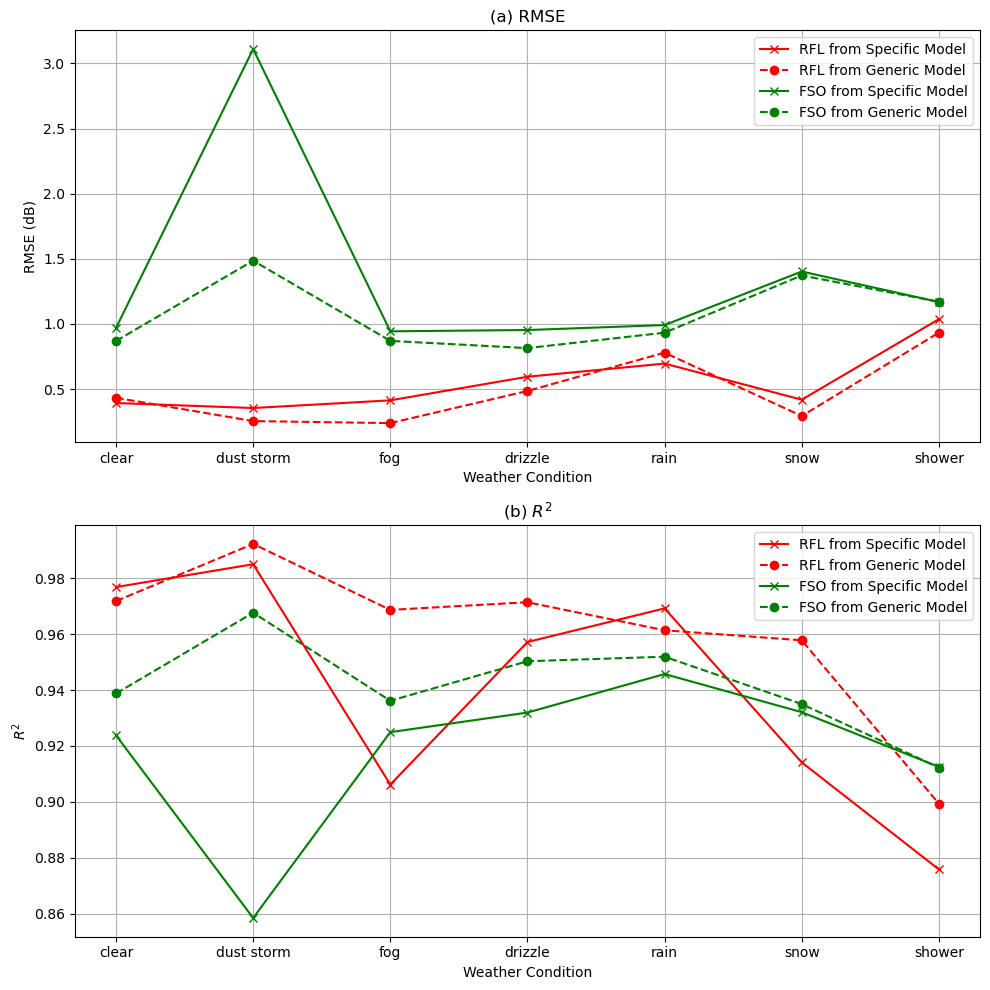

In [23]:
# Plot RMSE and R² results
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# RMSE plot
axes[0].plot(synop_conditions, rmse_results['RFL_Specific'], 'r-', marker='x', label="RFL from Specific Model")
axes[0].plot(synop_conditions, rmse_results['RFL_Generic'], 'r--', marker='o', label="RFL from Generic Model")
axes[0].plot(synop_conditions, rmse_results['FSO_Specific'], 'g-', marker='x', label="FSO from Specific Model")
axes[0].plot(synop_conditions, rmse_results['FSO_Generic'], 'g--', marker='o', label="FSO from Generic Model")
axes[0].set_xlabel("Weather Condition")
axes[0].set_ylabel("RMSE (dB)")
axes[0].set_title("(a) RMSE")
axes[0].legend(loc="upper right")
axes[0].grid(True)

# R² plot
axes[1].plot(synop_conditions, r2_results['RFL_Specific'], 'r-', marker='x', label="RFL from Specific Model")
axes[1].plot(synop_conditions, r2_results['RFL_Generic'], 'r--', marker='o', label="RFL from Generic Model")
axes[1].plot(synop_conditions, r2_results['FSO_Specific'], 'g-', marker='x', label="FSO from Specific Model")
axes[1].plot(synop_conditions, r2_results['FSO_Generic'], 'g--', marker='o', label="FSO from Generic Model")
axes[1].set_xlabel("Weather Condition")
axes[1].set_ylabel("$R^2$")
axes[1].set_title("(b) $R^2$")
axes[1].legend(loc="upper right")
axes[1].grid(True)

plt.tight_layout()
plt.show()

The generic model outperforms specfic model for most weather conditions for both RFL and FSO attenuation.

### Trimester 2

#### Method 2 

Use predicted output of RF Att from specific and general model as feature to predict corresponding FSO_Att for Specific and General models

#### Method 3

Use predicted output of FSO Att from specific and general model as feature to predict for Specific and General models

#### Method 4

Train big neural network to preict both RF Att and FSO Att